In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('batch_run_results.csv')

In [8]:
df.tail()

,Unnamed: 0,RunId,iteration,Step,initial_cooperate_prob,payoff_CC,payoff_CD,payoff_DC,payoff_DD,ratio_choice,Majority_Rule_Agents,Best_Neighbor_Agents,Random_Agents,Average_Score_Majority,Average_Score_Best_Neighbor,Average_Score_Random,Defecting_Agents,Cooperating_Agents
165235,165235,3239,1,46,1.0,3.0,3.0,3.0,3.0,more_random,625,625,1250,1104.0,1104.0,1104.0,0,2500
165236,165236,3239,1,47,1.0,3.0,3.0,3.0,3.0,more_random,625,625,1250,1128.0,1128.0,1128.0,0,2500
165237,165237,3239,1,48,1.0,3.0,3.0,3.0,3.0,more_random,625,625,1250,1152.0,1152.0,1152.0,0,2500
165238,165238,3239,1,49,1.0,3.0,3.0,3.0,3.0,more_random,625,625,1250,1176.0,1176.0,1176.0,0,2500
165239,165239,3239,1,50,1.0,3.0,3.0,3.0,3.0,more_random,625,625,1250,1200.0,1200.0,1200.0,0,2500


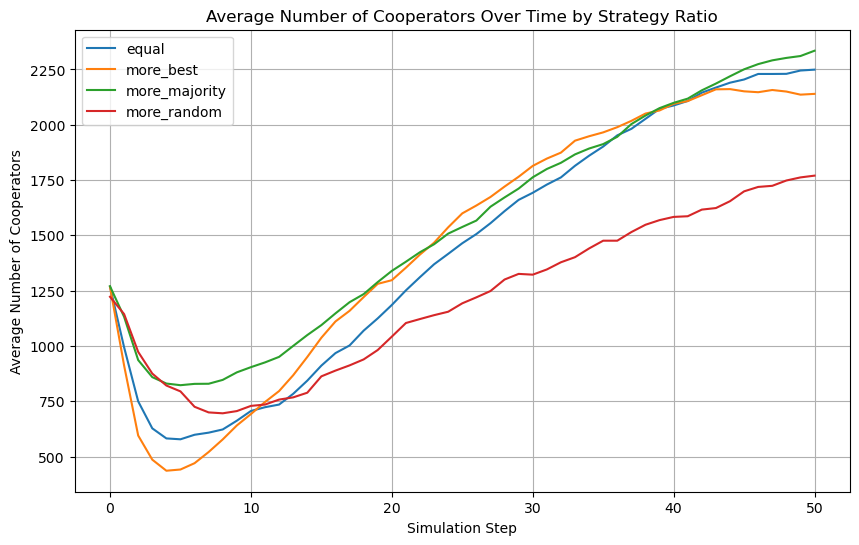

In [6]:
# create a plot to observe the number of cooperators based on similar conditions
# from the orginial PD model

# Here, I aim to observe how the distribuctions of different learning strategies influnce
# the speard rate of beahavior

specific_payoff_data = df[
    (df['payoff_CC'] == 1.5) &
    (df['payoff_CD'] == 0.0) &
    (df['payoff_DC'] == 3.0) &
    (df['payoff_DD'] == 0.0) &
    (df['initial_cooperate_prob'] == 0.5)
]

cooperator_counts_over_time = specific_payoff_data.groupby(['Step', 'ratio_choice'])['Cooperating_Agents'].mean().reset_index()

plt.figure(figsize=(10, 6))

for ratio in cooperator_counts_over_time['ratio_choice'].unique():
    plt.plot(
        cooperator_counts_over_time[cooperator_counts_over_time['ratio_choice'] == ratio]['Step'],
        cooperator_counts_over_time[cooperator_counts_over_time['ratio_choice'] == ratio]['Cooperating_Agents'],
        linestyle='-',
        label=ratio
    )

plt.xlabel('Simulation Step')
plt.ylabel('Average Number of Cooperators')
plt.title('Average Number of Cooperators Over Time by Strategy Ratio')
plt.legend()
plt.grid(True)
plt.show()

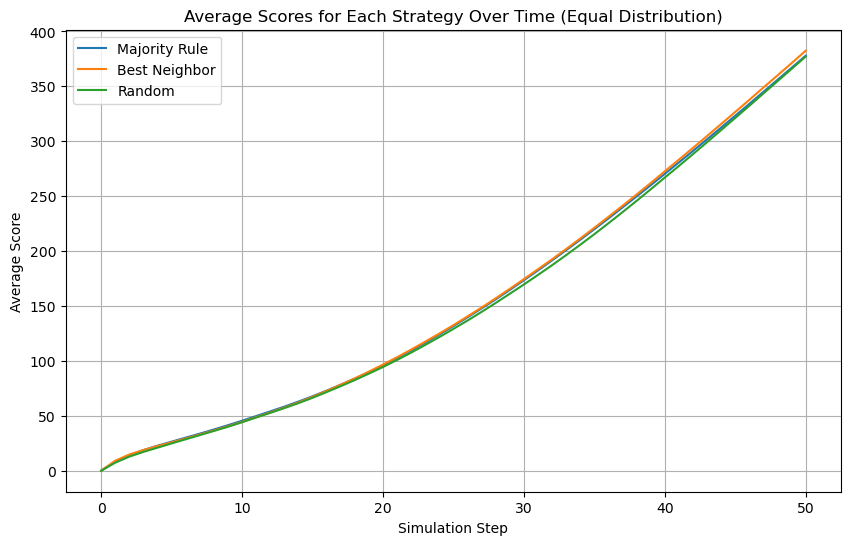

In [22]:
# create a plot to observe the scores of each learning strategt based on similar conditions
# from the orginial PD model

# Here, I aim to observe how the scores of different learning strategies change based on the
# "equal" distribution

specific_payoff_data_equal_distribution = df[
    (df['payoff_CC'] == 1.5) &
    (df['payoff_CD'] == 0.0) &
    (df['payoff_DC'] == 3.0) &
    (df['payoff_DD'] == 0.0) &
    (df['initial_cooperate_prob'] == 0.5) &
    (df['ratio_choice'] == 'equal')
]


scores_over_time_equal = specific_payoff_data_equal_distribution.groupby(['Step'])[
    ['Average_Score_Majority', 'Average_Score_Best_Neighbor', 'Average_Score_Random']
].mean().reset_index()

plt.figure(figsize=(10, 6))

plt.plot(scores_over_time_equal['Step'], scores_over_time_equal['Average_Score_Majority'], label='Majority Rule', linestyle='-')
plt.plot(scores_over_time_equal['Step'], scores_over_time_equal['Average_Score_Best_Neighbor'], label='Best Neighbor', linestyle='-')
plt.plot(scores_over_time_equal['Step'], scores_over_time_equal['Average_Score_Random'], label='Random', linestyle='-')

plt.xlabel('Simulation Step')
plt.ylabel('Average Score')
plt.title('Average Scores for Each Strategy Over Time (Equal Distribution)')
plt.legend()
plt.grid(True)
plt.show()

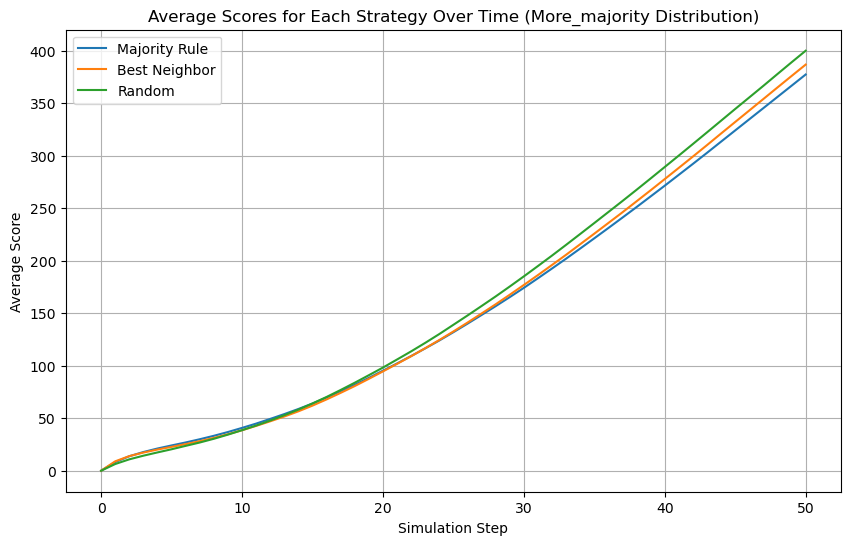

In [8]:
# create a plot to observe the distribution of learning strategies influnce the scores

# Here, I aim to observe how the scores of different learning strategies change based on the
# "more_best" distribution

# restrict the data to the specific payoffs, initial cooperation probability of 0.5, and 'equal' distribution

specific_payoff_data_equal_distribution = df[
    (df['payoff_CC'] == 1.5) &
    (df['payoff_CD'] == 0.0) &
    (df['payoff_DC'] == 3.0) &
    (df['payoff_DD'] == 0.0) &
    (df['initial_cooperate_prob'] == 0.5) &
    (df['ratio_choice'] == 'more_best')
]

scores_over_time_equal = specific_payoff_data_equal_distribution.groupby(['Step'])[
    ['Average_Score_Majority', 'Average_Score_Best_Neighbor', 'Average_Score_Random']
].mean().reset_index()


plt.figure(figsize=(10, 6))


plt.plot(scores_over_time_equal['Step'], scores_over_time_equal['Average_Score_Majority'], label='Majority Rule', linestyle='-')
plt.plot(scores_over_time_equal['Step'], scores_over_time_equal['Average_Score_Best_Neighbor'], label='Best Neighbor', linestyle='-')
plt.plot(scores_over_time_equal['Step'], scores_over_time_equal['Average_Score_Random'], label='Random', linestyle='-')

plt.xlabel('Simulation Step')
plt.ylabel('Average Score')
plt.title('Average Scores for Each Strategy Over Time (More_majority Distribution)')
plt.legend()
plt.grid(True)
plt.show()


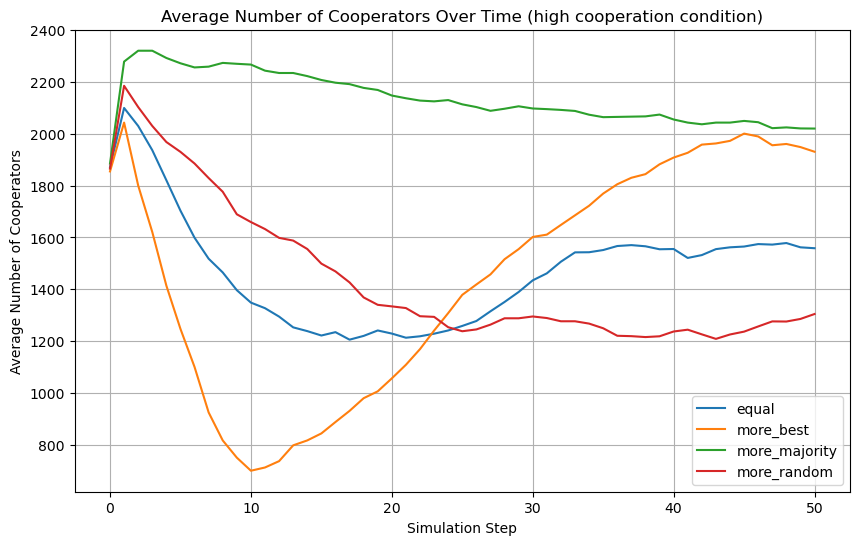

In [11]:
# create a plot to observe the speard of the behaviors when there is no effect from 
# the pay-offs and with a higher probability to favor one specific behavior

# Here, I aim to observe the number of cooperators based on the conditions that remove 
# the payoff when favoring the speard of cooperators. 

specific_payoff_data = df[
    (df['payoff_CC'] == 1.5) &
    (df['payoff_CD'] == 0.0) &
    (df['payoff_DC'] == 3) &
    (df['payoff_DD'] == 0.0) &
    (df['initial_cooperate_prob'] == 0.75)
]


cooperator_counts_over_time = specific_payoff_data.groupby(['Step', 'ratio_choice'])['Cooperating_Agents'].mean().reset_index()

plt.figure(figsize=(10, 6))

for ratio in cooperator_counts_over_time['ratio_choice'].unique():
    plt.plot(
        cooperator_counts_over_time[cooperator_counts_over_time['ratio_choice'] == ratio]['Step'],
        cooperator_counts_over_time[cooperator_counts_over_time['ratio_choice'] == ratio]['Cooperating_Agents'],
        linestyle='-',
        label=ratio
    )

plt.xlabel('Simulation Step')
plt.ylabel('Average Number of Cooperators')
plt.title('Average Number of Cooperators Over Time (high cooperation condition)')
plt.legend()
plt.grid(True)
plt.show()


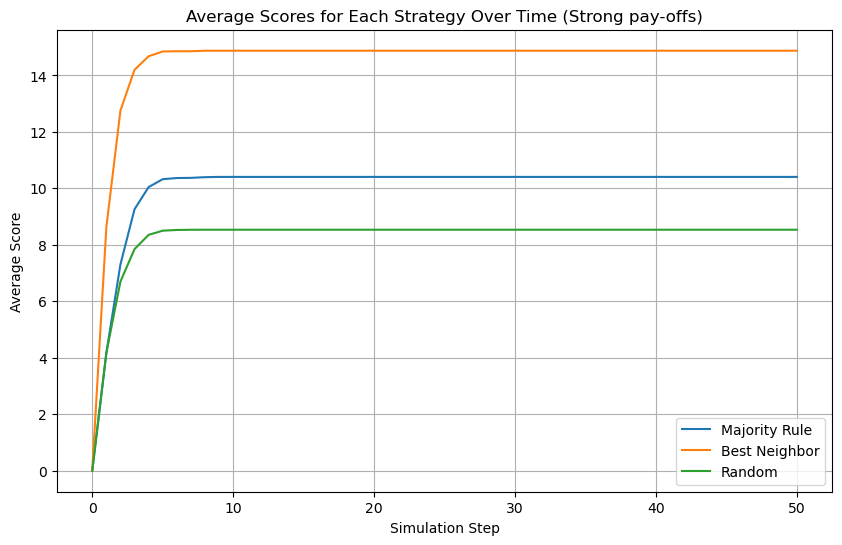

In [15]:
specific_payoff_data_equal_distribution = df[
    (df['payoff_CC'] == 0.0) &
    (df['payoff_CD'] == 0.0) &
    (df['payoff_DC'] == 3.0) &
    (df['payoff_DD'] == 0.0) &
    (df['initial_cooperate_prob'] == 0.5) &
    (df['ratio_choice'] == 'equal')
]


scores_over_time_equal = specific_payoff_data_equal_distribution.groupby(['Step'])[
    ['Average_Score_Majority', 'Average_Score_Best_Neighbor', 'Average_Score_Random']
].mean().reset_index()

plt.figure(figsize=(10, 6))

plt.plot(scores_over_time_equal['Step'], scores_over_time_equal['Average_Score_Majority'], label='Majority Rule', linestyle='-')
plt.plot(scores_over_time_equal['Step'], scores_over_time_equal['Average_Score_Best_Neighbor'], label='Best Neighbor', linestyle='-')
plt.plot(scores_over_time_equal['Step'], scores_over_time_equal['Average_Score_Random'], label='Random', linestyle='-')

plt.xlabel('Simulation Step')
plt.ylabel('Average Score')
plt.title('Average Scores for Each Strategy Over Time (Strong pay-offs)')
plt.legend()
plt.grid(True)
plt.show()

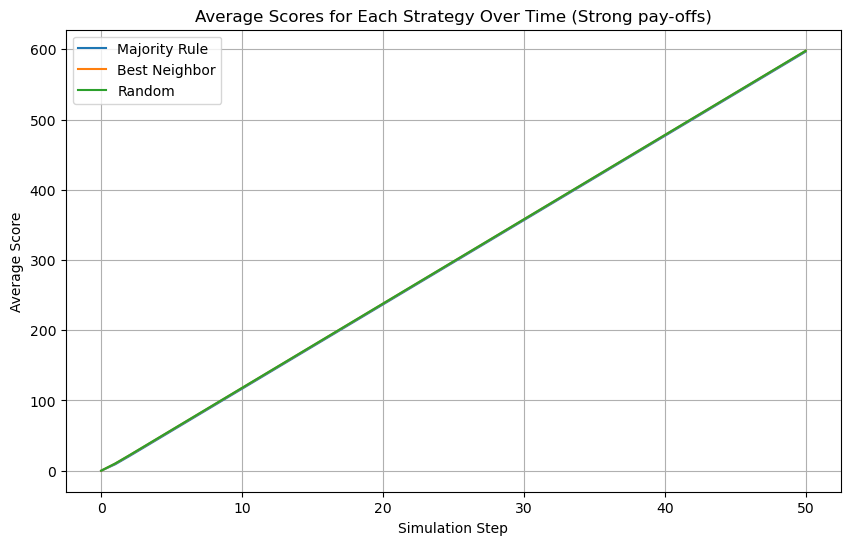

In [17]:
specific_payoff_data_equal_distribution = df[
    (df['payoff_CC'] == 1.5) &
    (df['payoff_CD'] == 0.0) &
    (df['payoff_DC'] == 0.0) &
    (df['payoff_DD'] == 0.0) &
    (df['initial_cooperate_prob'] == 0.75) &
    (df['ratio_choice'] == 'equal')
]


scores_over_time_equal = specific_payoff_data_equal_distribution.groupby(['Step'])[
    ['Average_Score_Majority', 'Average_Score_Best_Neighbor', 'Average_Score_Random']
].mean().reset_index()

plt.figure(figsize=(10, 6))

plt.plot(scores_over_time_equal['Step'], scores_over_time_equal['Average_Score_Majority'], label='Majority Rule', linestyle='-')
plt.plot(scores_over_time_equal['Step'], scores_over_time_equal['Average_Score_Best_Neighbor'], label='Best Neighbor', linestyle='-')
plt.plot(scores_over_time_equal['Step'], scores_over_time_equal['Average_Score_Random'], label='Random', linestyle='-')

plt.xlabel('Simulation Step')
plt.ylabel('Average Score')
plt.title('Average Scores for Each Strategy Over Time (Strong pay-offs)')
plt.legend()
plt.grid(True)
plt.show()